# 03_MasterBDMl_modelo2_breastE2E_feature_selection
Autor: Carlos Wong <br/>
Fecha: 2022_04_17 <br/>
Tipo de problema: `CLASIFICACIÓN` <br/>
Entradas: `dataset: breast_cancer_data` <br/>
Salidas: modelo predictivo  <br/>
Propósito: Descarga, entrenamiento, predicción y documentación con `SKLEARN` <br/>
1. `Librerías + Descarga de datos <-------- `
2. Exploración de la variable objetivo
3. EDA (Exploración de datos)
4. Feature Engineering (Transformación de variables)
5. `Selección de variables <-------- `
6. `Modelos (pipeline, semilla en train_test split y modelos, comparación modelos) <-------- `
7. Métricas de evaluación
8. Selección de algoritmo
9. Parametrización de algoritmo
10. Guardado del modelo

# 1. Librerías + Descarga de datos

In [3]:
# librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
#np.set_printoptions(precision=2)
pd.set_option('display.max_columns', 500)  # Muestra hasta 500 columnas del dataframe (evita los puntos '...'')

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [139]:
# librerías sklearn
import sklearn
from sklearn.feature_selection import SelectKBest, chi2   # <------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.pipeline import Pipeline, make_pipeline   # <------------------------
from sklearn.decomposition import PCA   # <------------------------
from sklearn.feature_selection import RFE   # <------------------------

In [6]:
# librerías de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
data = pd.read_csv(r'.\datasets\breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
# Se eliminan columnas innecesarias
data = data.drop(['id','Unnamed: 32'], axis=1)

In [10]:
features = data.drop('diagnosis', axis=1)
target = data['diagnosis']

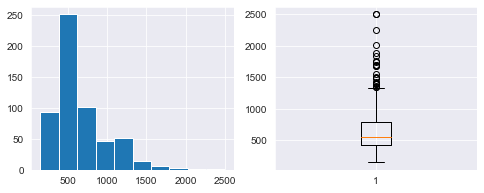

In [11]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
plt.hist(data['area_mean'])
plt.subplot(1,2,2)
plt.boxplot(data['area_mean'])
plt.show()

## 4. Feature Engineering

In [12]:
# En Sklearn los datos se insertan en formato numpy
X = features['area_mean']
X

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64

In [13]:
# shape indica las dimensiones
# cuando se muestra de ésta manera (569,) indica que es una serie de pandas
# Sklearn NO ENTIENDE BIEN las series de pandas
X.shape

(569,)

In [14]:
# éste formato de dataframe SÍ LO ENTIENDE bien Sklearn
X = features[['area_mean']]
X

,area_mean
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


In [15]:
# esto SÍ lo entiende bien Sklearn
X.shape

(569, 1)

### 4.1. Rescale (MinMaxScaler)
- Se reescalan los datos en el intervalo [0,1], y se eliminan magnitudes
- Sklearn funciona con TRANSFORMADORES ('transform')

In [16]:
# Paso 1: Cargo en una variable el modelo seleccionado (por ejemplo: logistic regression con su parametrización)
X = features[['area_mean']]

In [17]:
# Paso 2: Cargo MinMaxScaler con su parametrización
scaler = MinMaxScaler()

In [18]:
# Paso 3: Ajustar (calcula el min, el max) y Transformar (aplica a la X, o sólo a las columnas seleccionadas)
# (Sklearn muestra los datos en formato numpy array)
X_transformed = scaler.fit_transform(X)
X_transformed

array([[0.36373277],
       [0.50159067],
       [0.44941676],
       [0.10290562],
       [0.4892895 ],
       [0.14150583],
       [0.38027572],
       [0.18426299],
       [0.15961824],
       [0.14099682],
       [0.27753977],
       [0.27041357],
       [0.4154825 ],
       [0.27113468],
       [0.18443266],
       [0.218579  ],
       [0.22948038],
       [0.27796394],
       [0.47359491],
       [0.17934252],
       [0.15970308],
       [0.05531283],
       [0.23792153],
       [0.53467656],
       [0.32284199],
       [0.32627784],
       [0.21264051],
       [0.40318134],
       [0.24979852],
       [0.34426299],
       [0.40063627],
       [0.12602333],
       [0.32059385],
       [0.43202545],
       [0.28152704],
       [0.30795334],
       [0.20763521],
       [0.16131495],
       [0.23554613],
       [0.17633086],
       [0.17794274],
       [0.09654295],
       [0.40742312],
       [0.17039236],
       [0.16458112],
       [0.39554613],
       [0.024772  ],
       [0.165

In [19]:
# Otra forma de conseguir lo mismo
X = features[['area_mean','texture_mean']]
X_transformed = MinMaxScaler().fit(X).transform(X)
X_transformed

array([[0.36373277, 0.0226581 ],
       [0.50159067, 0.27257355],
       [0.44941676, 0.3902604 ],
       ...,
       [0.30311771, 0.62123774],
       [0.4757158 , 0.66351031],
       [0.01590668, 0.50152181]])

In [20]:
X = features
X_transformed = MinMaxScaler().fit(X).transform(X)
X_transformed

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [21]:
# En caso de querer leer la transformación sklearn (array numpy) se debe pasar a pandas DataFrame
pd.DataFrame(X_transformed, columns=data.columns[1:])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


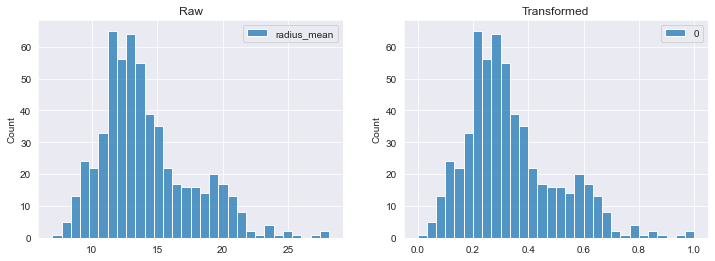

In [22]:
scaler = MinMaxScaler()

for feature in features:
    X = features[[feature]]
    X_transf = scaler.fit_transform (X)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(X, bins=30).set(title='Raw')
    plt.subplot(1,2,2)
    sns.histplot(X_transf, bins=30).set(title='Transformed')
    plt.show()
    break

### 4.2. Standarize (StandardScaler)
- Se centralizan los datos alrededor del cero
- Se eliminan magnitudes
- No mejora skewness/kurtosis
- Con datos no distribuídos de forma normal, no se gana mucho

In [23]:
X = features[['area_mean','texture_mean']]
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X)

In [24]:
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


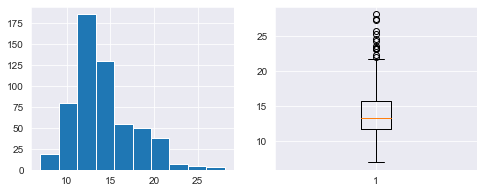

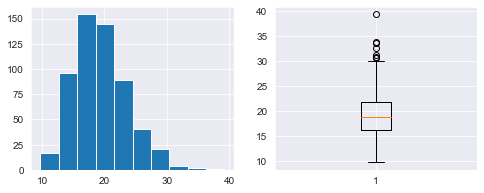

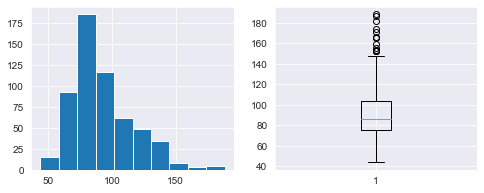

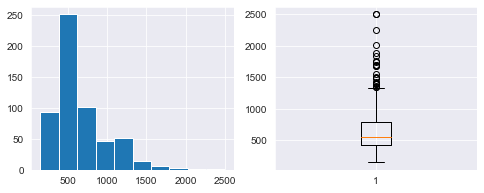

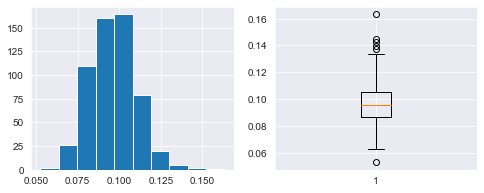

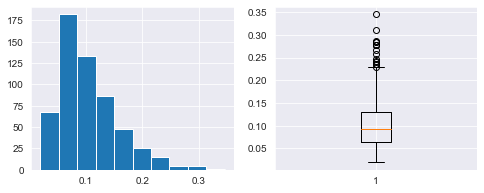

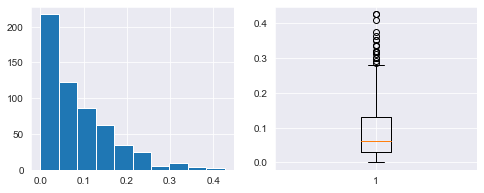

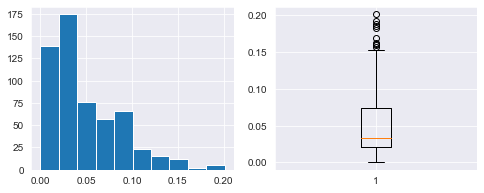

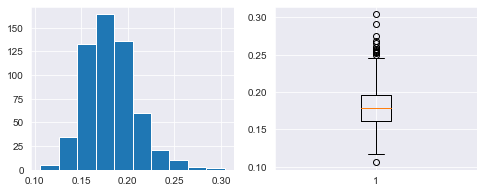

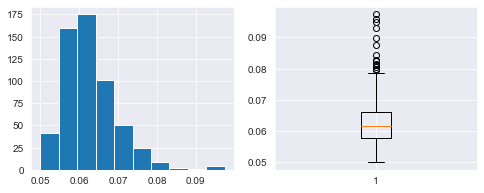

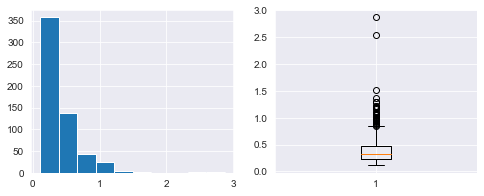

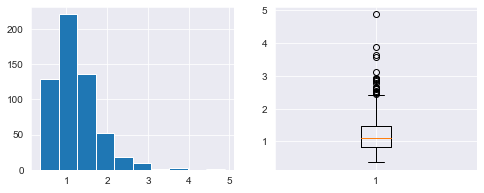

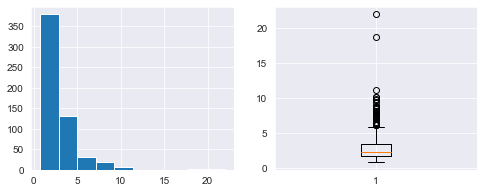

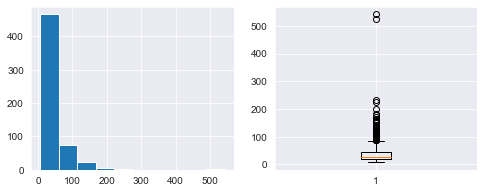

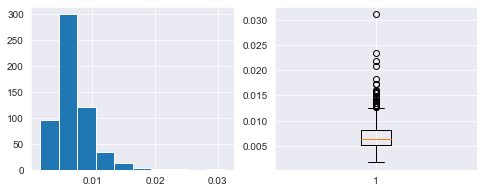

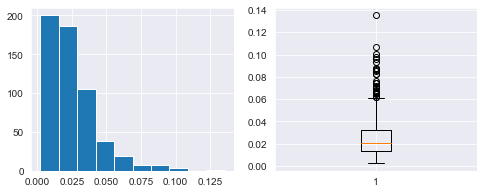

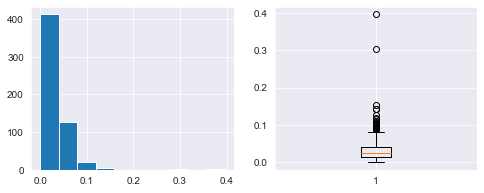

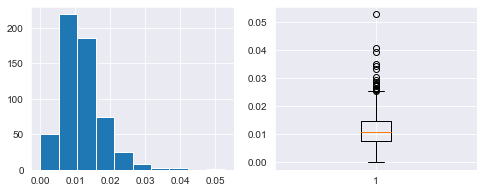

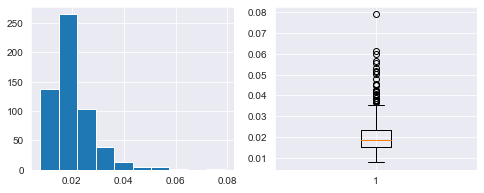

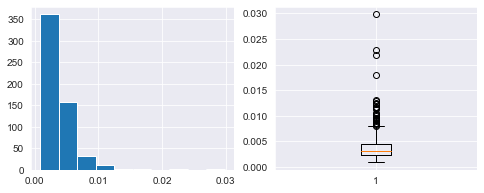

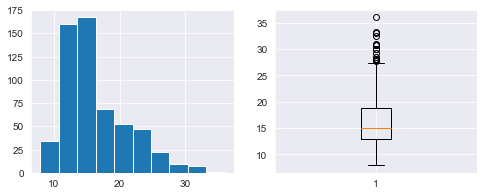

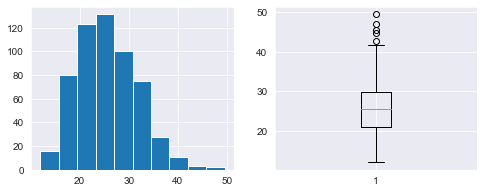

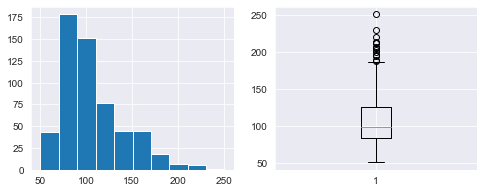

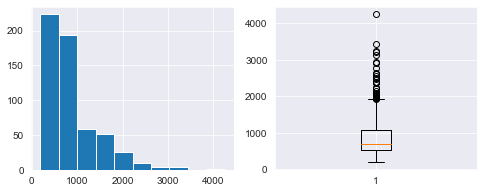

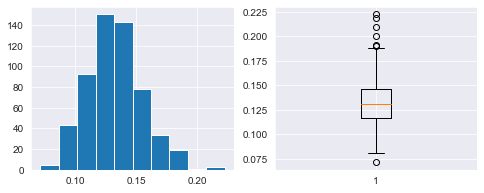

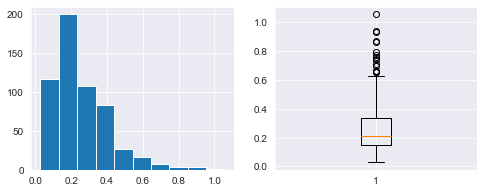

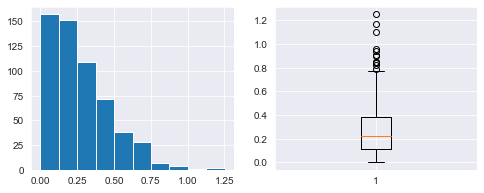

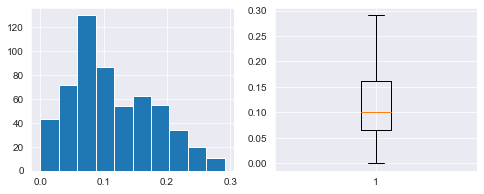

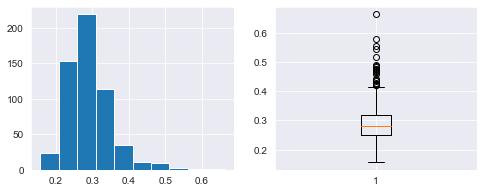

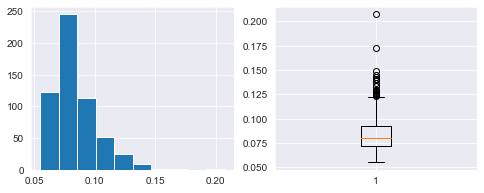

In [25]:
for feature in features:
    plt.figure(figsize = (8,3))
    plt.subplot(1,2,1)
    plt.hist(data[feature])
    plt.subplot(1,2,2)
    plt.boxplot(data[feature])
    plt.show()

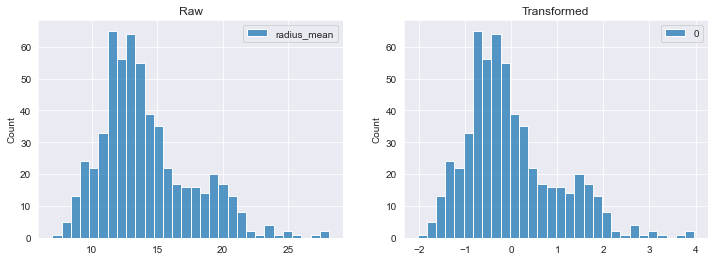

In [26]:
scaler = StandardScaler()

for feature in features:
    X = features[[feature]]
    X_transf = scaler.fit_transform (X)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(X, bins=30).set(title='Raw')
    plt.subplot(1,2,2)
    sns.histplot(X_transf, bins=30).set(title='Transformed')
    plt.show()
    break

### Se usa el comando `'inverse_transform'` para `recuperar` los datos originales y devolverlos a 'negocio'

In [27]:
X = features[['area_mean']]
print(X[0:5])

print('-------------------------------')

scaler = StandardScaler()
scaler = scaler.fit(X) 
Xrescaled = scaler.transform(X)
print(Xrescaled[0:5])

print('-------------------------------')

Xraw = scaler.inverse_transform(Xrescaled)
print(Xraw[0:5])

   area_mean
0     1001.0
1     1326.0
2     1203.0
3      386.1
4     1297.0
-------------------------------
[[ 0.9843749 ]
 [ 1.90870825]
 [ 1.55888363]
 [-0.76446379]
 [ 1.82622928]]
-------------------------------
[[1001. ]
 [1326. ]
 [1203. ]
 [ 386.1]
 [1297. ]]


### 4.3. Normalización (Normalizer)
- Funciona bien cuando no hay datos gaussianos
- Tiene sentido usarla con más de una feature
- Reescala a nivel de fila, y no a nivel de columna como los 2 escalados anteriores

In [28]:
#scaler = Normalizer.fit()
#NormalizedX = scaler.transform(X)

### 4.4. Binarize 
- Crea variables DUMMY con valores (0-1).
- A partir de un umbral en el dato se le asigna el valor 1, de lo contrario, el 0
- Casos de uso: Datos nulos Vs. No Nulos, Datos desbalanceados (con muchos ceros)
- Generación de variables dummy, usando de umbral la media o la mediana

In [29]:
umbral = np.median(X)
umbral

551.1

In [30]:
X = features[['area_mean']]
umbral = np.median(X)
binaryX = Binarizer(threshold=umbral).fit(X).transform(X)
binaryX

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [31]:
X

,area_mean
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


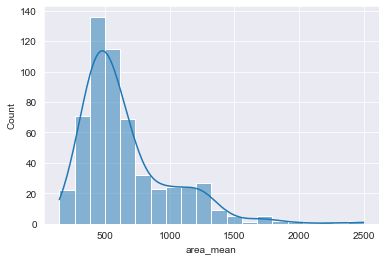

In [32]:
sns.histplot(x='area_mean', data=data, bins=20, kde=True)
plt.show()

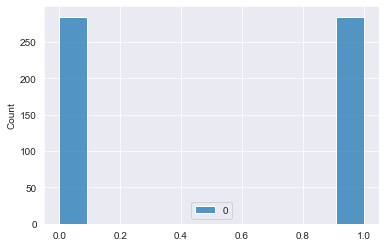

In [33]:
sns.histplot(binaryX)
plt.show()

13.37


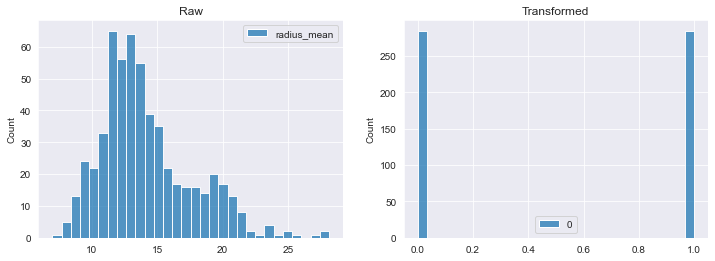

18.84


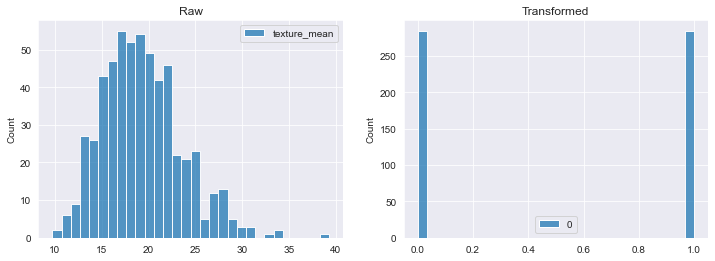

86.24


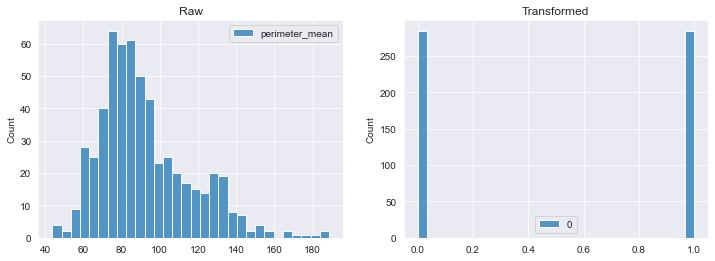

551.1


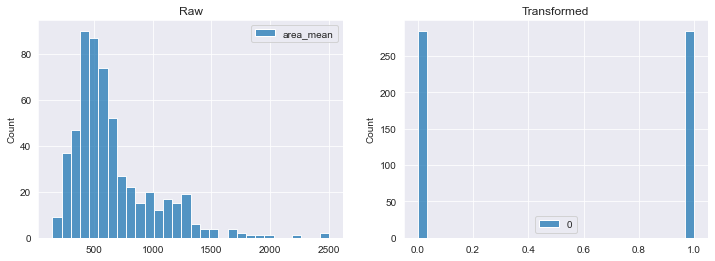

0.09587000000000001


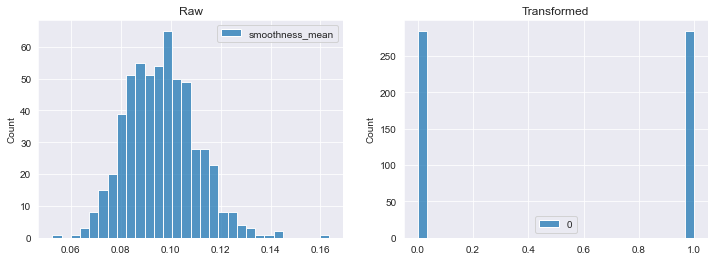

0.09262999999999999


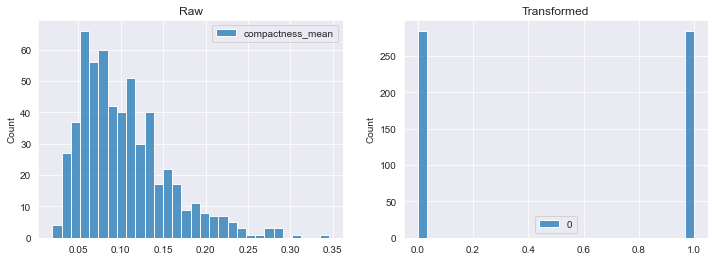

0.06154


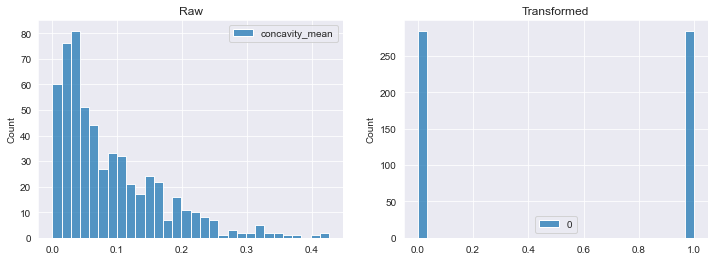

0.0335


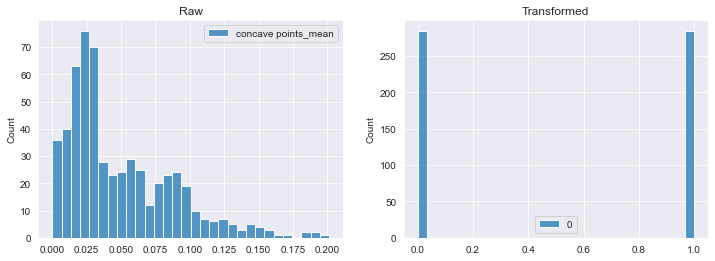

0.1792


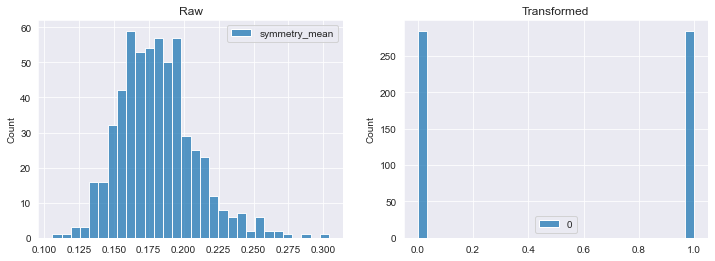

0.06154


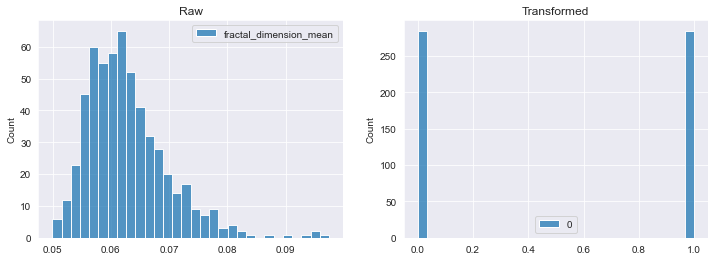

0.3242


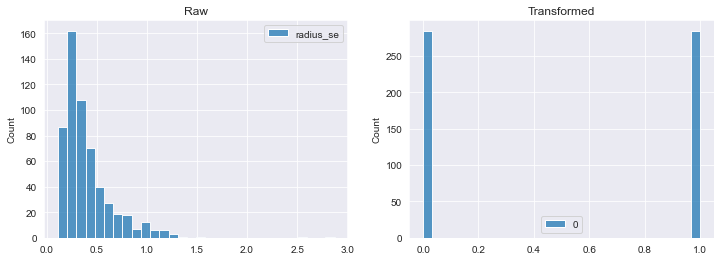

1.1079999999999999


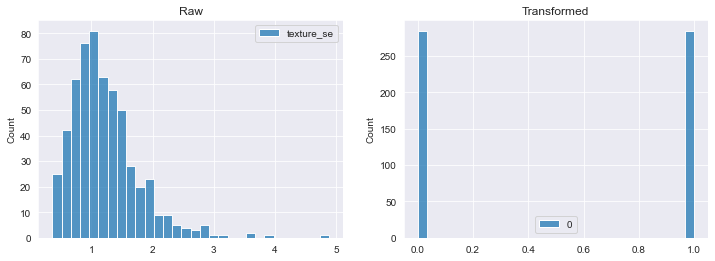

2.287


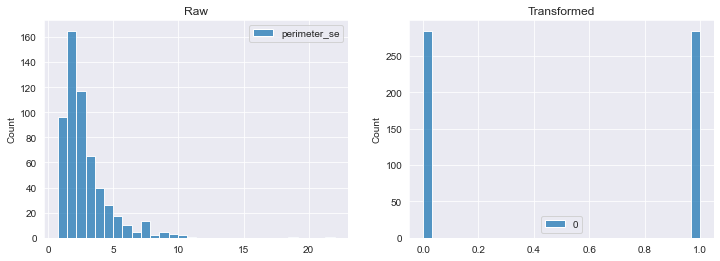

24.53


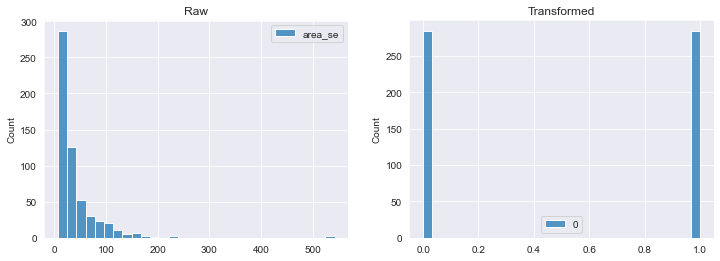

0.006379999999999999


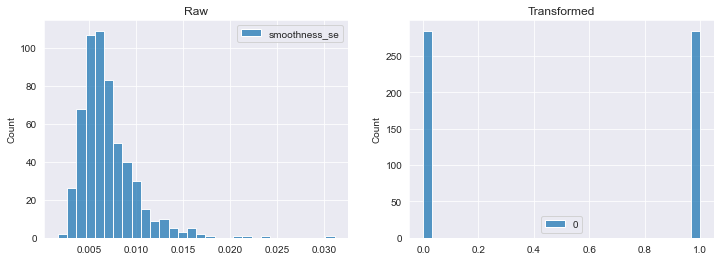

0.02045


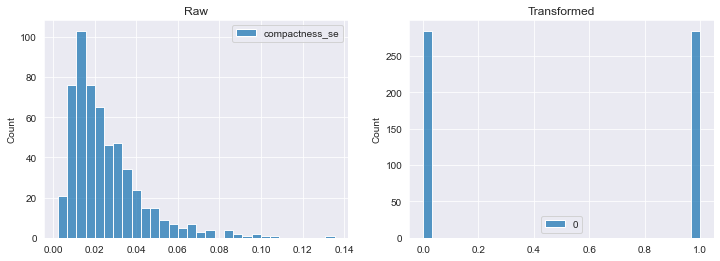

0.025889999999999996


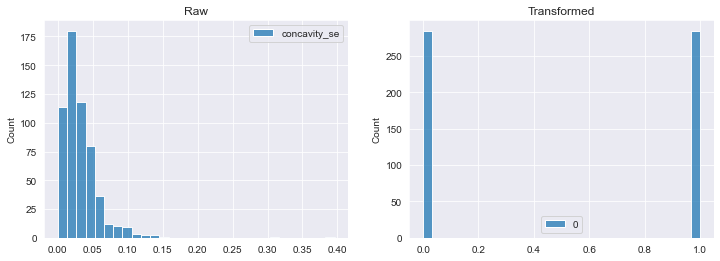

0.01093


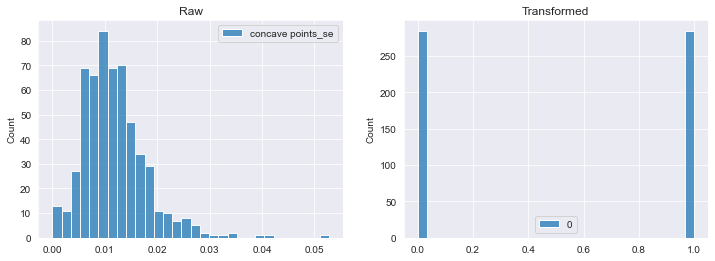

0.01873


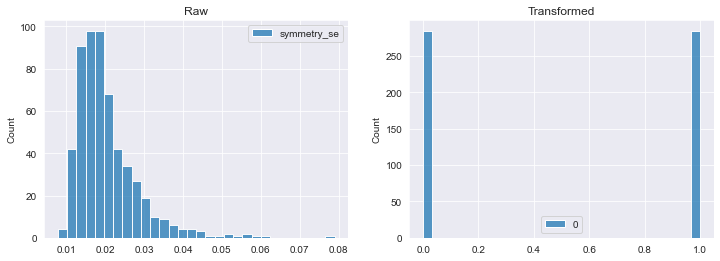

0.003187


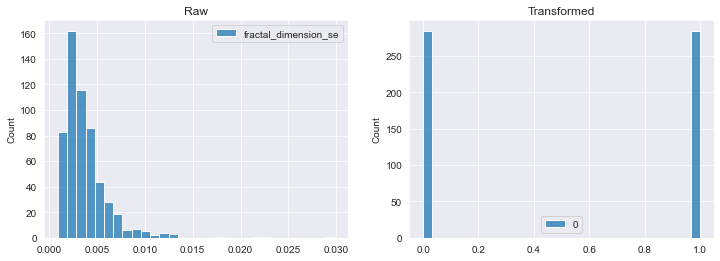

14.97


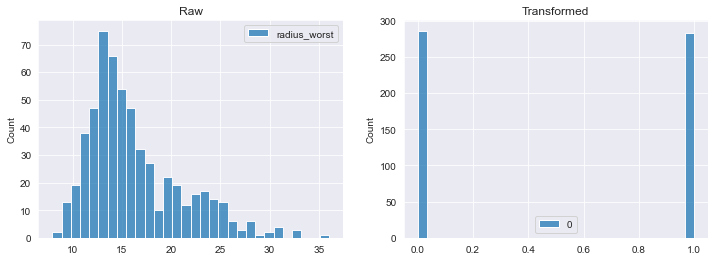

25.41


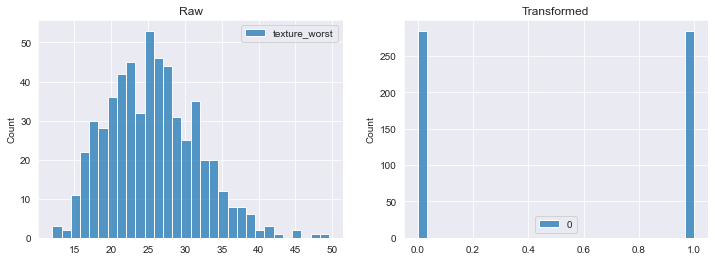

97.66


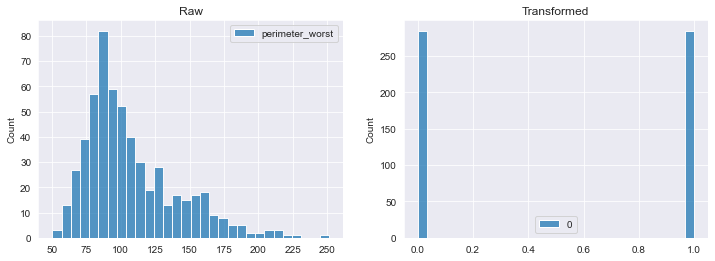

686.5


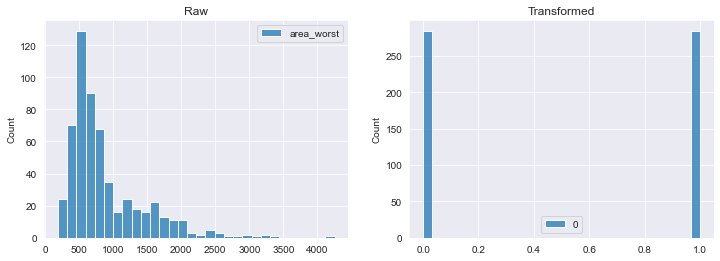

0.1313


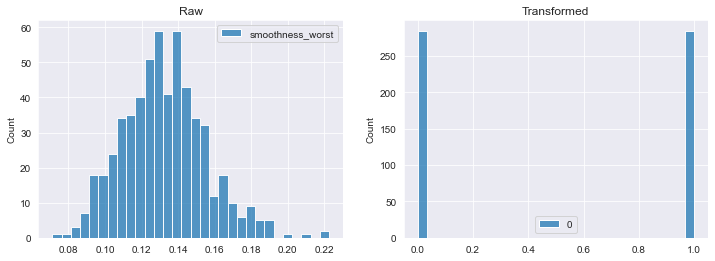

0.2119


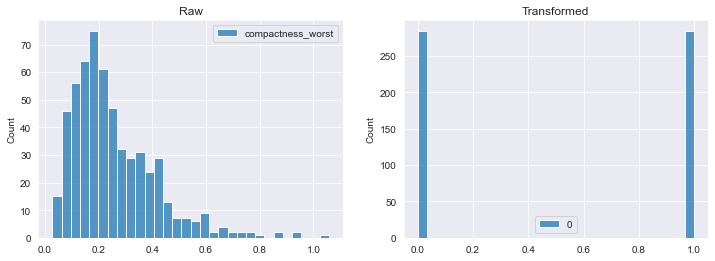

0.2267


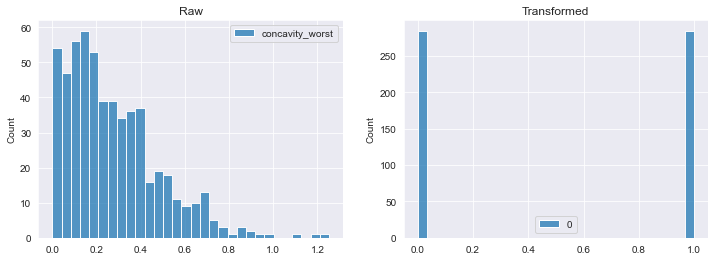

0.09992999999999999


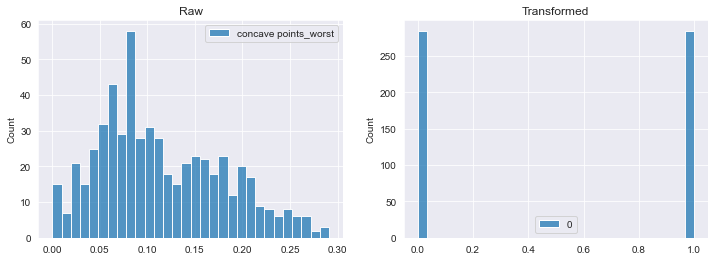

0.2822


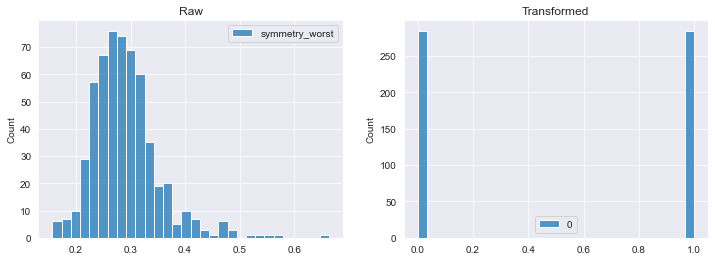

0.08004


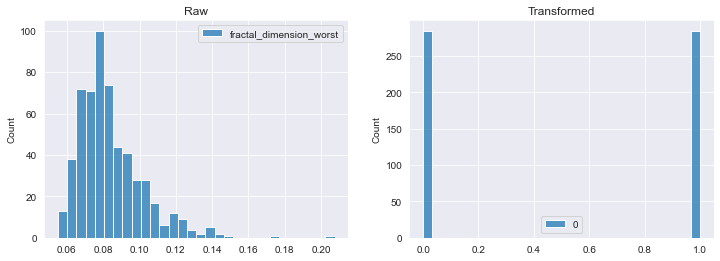

In [34]:
for feature in features:
    X = features[[feature]]
    umbral = np.median(X)
    print (umbral)
    scaler = Binarizer(threshold=umbral)
    X_transf = scaler.fit_transform (X)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(X, bins=30).set(title='Raw')
    plt.subplot(1,2,2)
    sns.histplot(X_transf, bins=30).set(title='Transformed')
    plt.show()

### Ejercicio: Binarizer de conjunto train/test split

In [35]:
# train_test split (80% para train y 20% para test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 99)

## 5. Feature Selection (SelectKBest)

### 5.1. Chi-cuadrado
- Contrasta cada feature con la variable objetivo
- Es un test de independencia que destaca aquellas variables que son relevantes para la clasificación
- Los valores tienen que ser positivos (por eso a veces es necesario es el escalado previo)

In [36]:
X,y = features, target

In [43]:
# Selección del criterio de evaluación
criteria = SelectKBest(score_func=chi2, k=4)   # <-----------
results = criteria.fit(X, y)   # transformador   <-----------

In [44]:
# para conocer datos del modelo hay que preguntar al transformador por ellos
# pero para poder ver el nombre de las variables hay que listarlos y asociarlos con sus variables 'zip'
list(zip(results.scores_, features.columns))

[(266.1049171951789, 'radius_mean'),
 (93.89750809863318, 'texture_mean'),
 (2011.102863767908, 'perimeter_mean'),
 (53991.65592375095, 'area_mean'),
 (0.14989926383938276, 'smoothness_mean'),
 (5.4030754907327, 'compactness_mean'),
 (19.71235355279164, 'concavity_mean'),
 (10.54403542854299, 'concave points_mean'),
 (0.25737977480878865, 'symmetry_mean'),
 (7.430655358550388e-05, 'fractal_dimension_mean'),
 (34.67524723165561, 'radius_se'),
 (0.009793539703986717, 'texture_se'),
 (250.57189635982135, 'perimeter_se'),
 (8758.504705334488, 'area_se'),
 (0.0032662066394236306, 'smoothness_se'),
 (0.6137853315214397, 'compactness_se'),
 (1.0447176147781296, 'concavity_se'),
 (0.3052315633783288, 'concave points_se'),
 (8.036338308403279e-05, 'symmetry_se'),
 (0.006371365657039512, 'fractal_dimension_se'),
 (491.689157433323, 'radius_worst'),
 (174.44939960571077, 'texture_worst'),
 (3665.0354163405914, 'perimeter_worst'),
 (112598.43156405367, 'area_worst'),
 (0.39736569437302727, 'smooth

In [46]:
# para preguntar por los p-valores del modelo
list(zip(results.pvalues_, features.columns))

[(8.013976278327987e-60, 'radius_mean'),
 (3.3229219424707174e-22, 'texture_mean'),
 (0.0, 'perimeter_mean'),
 (0.0, 'area_mean'),
 (0.6986316439643425, 'smoothness_mean'),
 (0.020101299869930245, 'compactness_mean'),
 (9.001757118104553e-06, 'concavity_mean'),
 (0.0011656363837254035, 'concave points_mean'),
 (0.611926026221788, 'symmetry_mean'),
 (0.9931222205939485, 'fractal_dimension_mean'),
 (3.895534287117009e-09, 'radius_se'),
 (0.921168191797165, 'texture_se'),
 (1.9487748916822534e-56, 'perimeter_se'),
 (0.0, 'area_se'),
 (0.9544251208536504, 'smoothness_se'),
 (0.43336611540692405, 'compactness_se'),
 (0.30672681214870456, 'concavity_se'),
 (0.580621137019778, 'concave points_se'),
 (0.992847409687171, 'symmetry_se'),
 (0.9363797534759143, 'fractal_dimension_se'),
 (6.113247507349991e-109, 'radius_worst'),
 (7.896682986749838e-40, 'texture_worst'),
 (0.0, 'perimeter_worst'),
 (0.0, 'area_worst'),
 (0.5284528674102658, 'smoothness_worst'),
 (1.108367622133013e-05, 'compactness

In [50]:
# para ver p-valores junto con scores del modelo
aux = list(zip(results.pvalues_, results.scores_, features.columns))
aux

[(8.013976278327987e-60, 266.1049171951789, 'radius_mean'),
 (3.3229219424707174e-22, 93.89750809863318, 'texture_mean'),
 (0.0, 2011.102863767908, 'perimeter_mean'),
 (0.0, 53991.65592375095, 'area_mean'),
 (0.6986316439643425, 0.14989926383938276, 'smoothness_mean'),
 (0.020101299869930245, 5.4030754907327, 'compactness_mean'),
 (9.001757118104553e-06, 19.71235355279164, 'concavity_mean'),
 (0.0011656363837254035, 10.54403542854299, 'concave points_mean'),
 (0.611926026221788, 0.25737977480878865, 'symmetry_mean'),
 (0.9931222205939485, 7.430655358550388e-05, 'fractal_dimension_mean'),
 (3.895534287117009e-09, 34.67524723165561, 'radius_se'),
 (0.921168191797165, 0.009793539703986717, 'texture_se'),
 (1.9487748916822534e-56, 250.57189635982135, 'perimeter_se'),
 (0.0, 8758.504705334488, 'area_se'),
 (0.9544251208536504, 0.0032662066394236306, 'smoothness_se'),
 (0.43336611540692405, 0.6137853315214397, 'compactness_se'),
 (0.30672681214870456, 1.0447176147781296, 'concavity_se'),
 (0

In [64]:
# para ver los resultados un poco mejor, se meten en un dataframe de pandas
pd_results = pd.DataFrame(aux, columns = ['p-valor','score','feature'])
pd_results.head

<bound method NDFrame.head of           p-valor          score                  feature
0    8.013976e-60     266.104917              radius_mean
1    3.322922e-22      93.897508             texture_mean
2    0.000000e+00    2011.102864           perimeter_mean
3    0.000000e+00   53991.655924                area_mean
4    6.986316e-01       0.149899          smoothness_mean
5    2.010130e-02       5.403075         compactness_mean
6    9.001757e-06      19.712354           concavity_mean
7    1.165636e-03      10.544035      concave points_mean
8    6.119260e-01       0.257380            symmetry_mean
9    9.931222e-01       0.000074   fractal_dimension_mean
10   3.895534e-09      34.675247                radius_se
11   9.211682e-01       0.009794               texture_se
12   1.948775e-56     250.571896             perimeter_se
13   0.000000e+00    8758.504705                  area_se
14   9.544251e-01       0.003266            smoothness_se
15   4.333661e-01       0.613785          

In [56]:
pd_results.sort_values('score', ascending=False)

,p-valor,score,feature
23,0.000000e+00,112598.431564,area_worst
3,0.000000e+00,53991.655924,area_mean
13,0.000000e+00,8758.504705,area_se
22,0.000000e+00,3665.035416,perimeter_worst
2,0.000000e+00,2011.102864,perimeter_mean
20,6.113248e-109,491.689157,radius_worst
0,8.013976e-60,266.104917,radius_mean
12,1.948775e-56,250.571896,perimeter_se
21,7.896683e-40,174.449400,texture_worst
1,3.322922e-22,93.897508,texture_mean


In [57]:
# el modelo se quedará con las 4 siguientes features (las mejores)
pd_results.sort_values('score', ascending=False).head(4)

,p-valor,score,feature
23,0.0,112598.431564,area_worst
3,0.0,53991.655924,area_mean
13,0.0,8758.504705,area_se
22,0.0,3665.035416,perimeter_worst


In [59]:
def plot_hist_box(feature):
    plt.figure(figsize = (15,3))
    plt.subplot(1,2,1)
    sns.histplot(x=feature, data=data, hue='diagnosis',kde=True)
    plt.subplot(1,2,2)
    sns.violinplot(x=feature, y='diagnosis', data=data)
    plt.show()

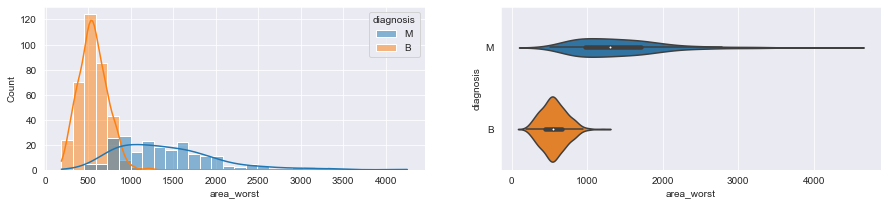

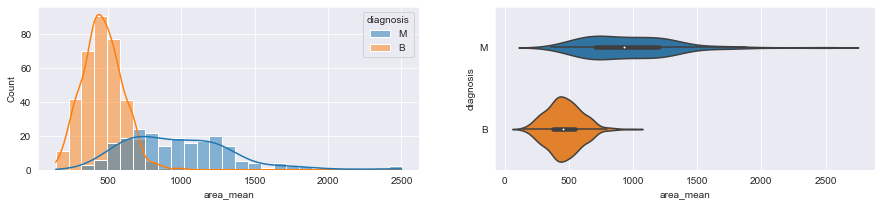

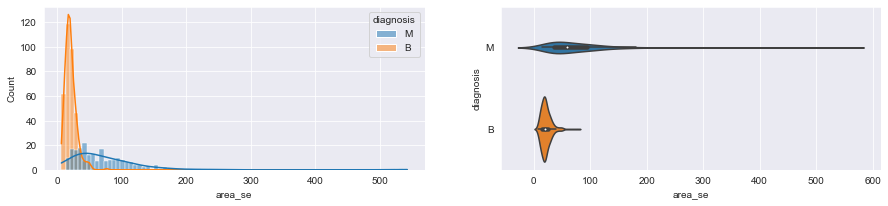

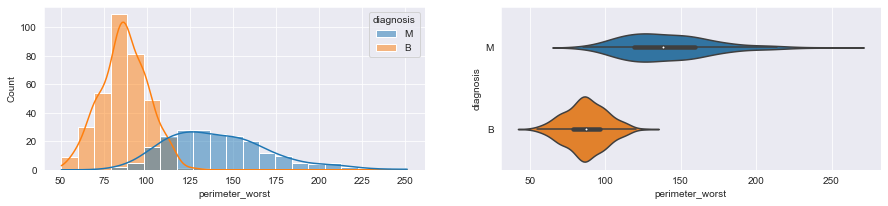

In [62]:
# las gráficas muestras que las mejores features explican muy bien la variable objetivo
plot_hist_box('area_worst')
plot_hist_box('area_mean')
plot_hist_box('area_se')
plot_hist_box('perimeter_worst')

## Ejercicio (!): 
### Pipeline con:
- train_test_split, 
- minmax_scaler, 
- faeture_extraction de k=4 y 
- logistic regression

In [125]:
# 'make_pipeline' ahorra el tener que poner nosotros un nombre, lo pone por defecto la función
from sklearn.pipeline import make_pipeline

X, y = features, target
# train_test split no entra en el pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

# el modelo se entrena con el train y se saca el score sobre el test
scaler = MinMaxScaler()   # 1ro. va el MinMaxScaler porque no puede tener valores negativos
selector = SelectKBest(score_func=chi2, k=4)  # se seleccionan primero las mejores 4 variables
algorithm = LogisticRegression (random_state=99) # se entrena el algoritmo sólo con las 4 mejores variables

pipeline = make_pipeline(scaler,selector,algorithm)
pipeline.fit(X_train, y_train)
results = pipeline.score(X_test, y_test)  # Se saca el resultado con el conjunto test

print(results)

0.9370629370629371


In [79]:
# se mete en un bucle 'for' el MISMO CÓDIGO para identificar con cuántas variables da mejor resultado
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

scaler = MinMaxScaler()   
algorithm = LogisticRegression (random_state=99) 

for i in range(4,30):  # <-------------
    selector = SelectKBest(score_func=chi2, k=i) 
    
    pipeline = make_pipeline(scaler,selector,algorithm)
    pipeline.fit(X_train, y_train)
    results = pipeline.score(X_test, y_test)  # Se saca el resultado con el conjunto test

    print(str(i) + ', accuracy = '+ str(results))

4, accuracy = 0.9370629370629371
5, accuracy = 0.9370629370629371
6, accuracy = 0.9370629370629371
7, accuracy = 0.9370629370629371
8, accuracy = 0.9370629370629371
9, accuracy = 0.9300699300699301
10, accuracy = 0.9300699300699301
11, accuracy = 0.9440559440559441
12, accuracy = 0.9440559440559441
13, accuracy = 0.9440559440559441
14, accuracy = 0.9370629370629371
15, accuracy = 0.9370629370629371
16, accuracy = 0.951048951048951
17, accuracy = 0.951048951048951
18, accuracy = 0.958041958041958
19, accuracy = 0.972027972027972
20, accuracy = 0.972027972027972
21, accuracy = 0.972027972027972
22, accuracy = 0.965034965034965
23, accuracy = 0.972027972027972
24, accuracy = 0.972027972027972
25, accuracy = 0.965034965034965
26, accuracy = 0.972027972027972
27, accuracy = 0.965034965034965
28, accuracy = 0.972027972027972
29, accuracy = 0.972027972027972


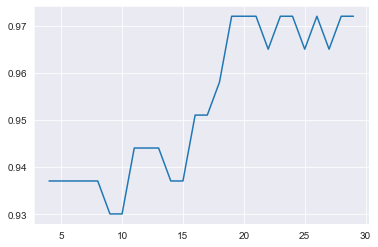

In [81]:
# se mete en un bucle 'for' el MISMO CÓDIGO para identificar con cuántas variables da mejor resultado
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

scaler = MinMaxScaler()   
algorithm = LogisticRegression (random_state=99) 

accuracies = []  # <-------------
n_features = []  # <-------------

for i in range(4,31):
    selector = SelectKBest(score_func=chi2, k=i) 
    
    pipeline = make_pipeline(scaler,selector,algorithm)
    pipeline.fit(X_train, y_train)
    results = pipeline.score(X_test, y_test)

    n_features.append(i)  # <-------------
    accuracies.append(results)  # <-------------
    
#    print(str(i) + ', accuracy = '+ str(results))

plt.plot(n_features, accuracies)
plt.show()

# Se concluye que el volumen adecuado es trabajar con 19 variables
# El siguiente paso es seleccionar los mejores modelos ...

### Feature Importances

In [84]:
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
results = model.score(X_test, y_test)
print(results)

0.9370629370629371


In [85]:
# '.feature_importances_' sirve para mostrar las variables más importantes
model.feature_importances_

array([0.        , 0.03038717, 0.        , 0.09326729, 0.        ,
       0.        , 0.00491417, 0.        , 0.00433604, 0.        ,
       0.00315224, 0.        , 0.        , 0.0398632 , 0.00655223,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01852266, 0.        , 0.        , 0.02584374,
       0.        , 0.        , 0.77316126, 0.        , 0.        ])

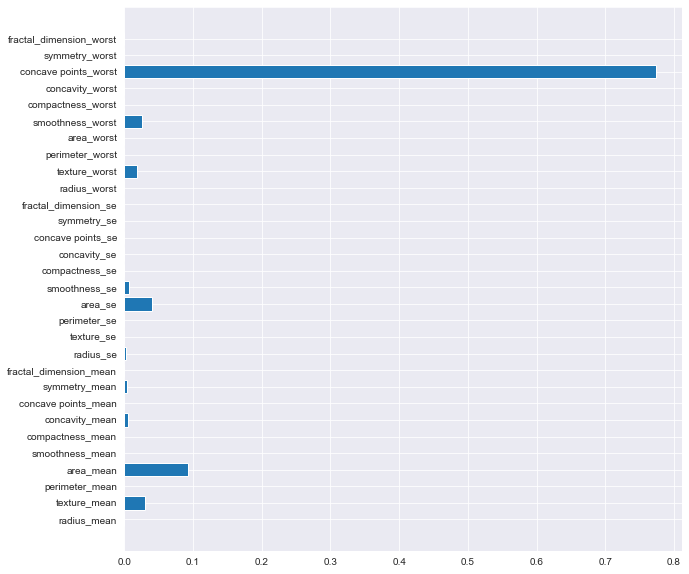

In [87]:
# la función 'feature_importances_' muestras las variables más importantes
plt.figure(figsize=(10,10))
plt.barh(y=X.columns, width=model.feature_importances_)
plt.show()

In [122]:
# Usando un algoritmo tipo ensemble y manteniendo el mismo código
from sklearn.ensemble import ExtraTreesClassifier

X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
results = model.score(X_test, y_test)
print(results)

0.972027972027972


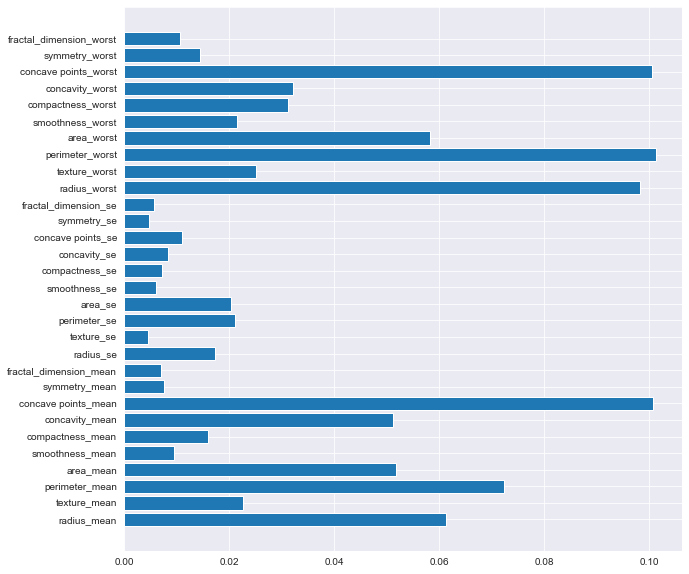

In [123]:
# la función 'feature_importances_' muestras las variables más importantes
# NO TODOS los modelos cuentas con la función 'feature_importances_'
plt.figure(figsize=(10,10))
plt.barh(y=X.columns, width=model.feature_importances_)
plt.show()

### Para sacar los Feature Importances de una Regresión Logística

0.972027972027972


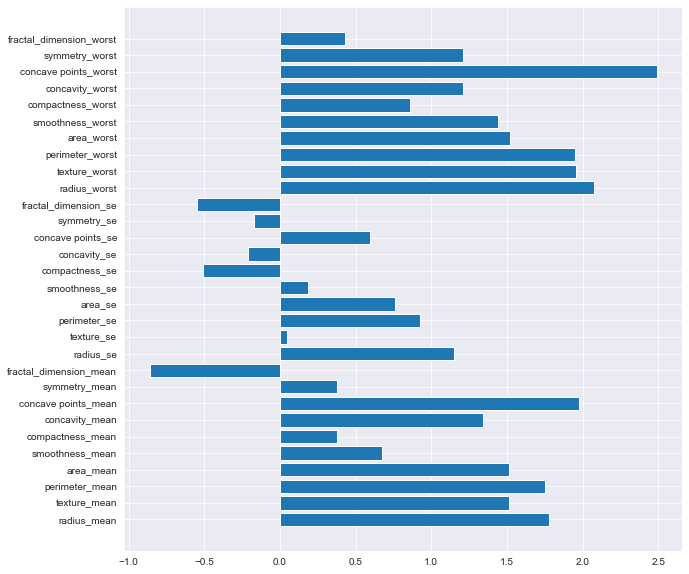

In [129]:
algorithm = LogisticRegression (random_state=99) 
scaler = MinMaxScaler()  # reescala los valores entre 0 y 1 
pipeline = make_pipeline(scaler, algorithm)

pipeline.fit(X_train,y_train)  # entrenamiemiento
print(pipeline.score(X_test,y_test))

plt.figure(figsize=(10,10))

# !!!! los coeficientes '.coef_' NO se pueden preguntar al pipeline, sino al algoritmo !!!!
# Se pueden sacar los '.coef_' porque el LogisticRegression tiene como atributo ese valor
# 'plt.barh' hace un plot de barras horizontal
# Se muestran los coeficientes normalizados
# Que salgan valores (+) o (-) significan que están correlacionados positiva o negativamente
# Se puede observar que la variable 'concave points_worst' está definida como más predictora por 2 algoritmos
plt.barh(y=X_train.columns, width=algorithm.coef_[0])
plt.show()

In [130]:
# Los coeficientes se generan en formato array con '[[....]]'
# no permiten insertarse en una gráfica
algorithm.coef_

array([[ 1.77678778,  1.51286681,  1.75216256,  1.51152036,  0.67601265,
         0.37931577,  1.3383281 ,  1.97707332,  0.37531651, -0.86291661,
         1.14972133,  0.04861534,  0.92259575,  0.75658664,  0.185712  ,
        -0.51043942, -0.21413679,  0.5973791 , -0.17546611, -0.55060287,
         2.07244031,  1.95552166,  1.95066918,  1.51924418,  1.44349276,
         0.86017535,  1.21060389,  2.49090343,  1.21141362,  0.43137159]])

In [131]:
# requiere que se extraigan del primer juego de '[]' usando '[0]'
algorithm.coef_[0]

array([ 1.77678778,  1.51286681,  1.75216256,  1.51152036,  0.67601265,
        0.37931577,  1.3383281 ,  1.97707332,  0.37531651, -0.86291661,
        1.14972133,  0.04861534,  0.92259575,  0.75658664,  0.185712  ,
       -0.51043942, -0.21413679,  0.5973791 , -0.17546611, -0.55060287,
        2.07244031,  1.95552166,  1.95066918,  1.51924418,  1.44349276,
        0.86017535,  1.21060389,  2.49090343,  1.21141362,  0.43137159])

## Componentes Principales (PCA)

In [133]:
pca = PCA(n_components=4)
pca_fitted = pca.fit(X)

In [135]:
# 'explained_variance_ratio_': ndarray of shape (n_components,)
# Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
pca_fitted.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04])

In [138]:
# 'components_': ndarray of shape (n_components, n_features)
# pca_fitted.components_

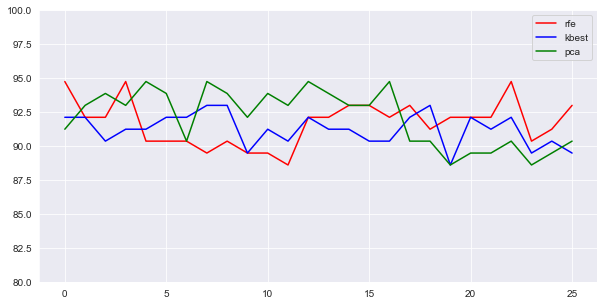

In [140]:
# Ejercicio, haced un pipeline que compare, con un 'Decision tree', minmaxscaler y rfe/kbest/pca para k=4:30
# Se puede probar con cualquier algoritmo además de Decision Tree
X, y = features, target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=99)

algorithm = DecisionTreeClassifier(random_state=99)
scaler = MinMaxScaler()

accuracies_rfe = []  # recursive feature elimination
accuracies_kbest = []
accuracies_pca = []

for k in range(4, 30):
    selector1 = SelectKBest(score_func=chi2, k=k)
    model1 = make_pipeline(scaler, selector1, algorithm)  # pipeline
    model1.fit(X_train, Y_train)  # entrenamiento
    result = model1.score(X_test, Y_test)   # prueba
    accuracies_rfe.append(result*100) 
    
    selector2 = RFE(algorithm, n_features_to_select=k)
    model2 = make_pipeline(scaler, selector2, algorithm)
    model2.fit(X_train, Y_train)
    result = model2.score(X_test, Y_test)
    accuracies_kbest.append(result*100)
    
    selector3 = PCA(n_components=k)
    model3 = make_pipeline(scaler, selector3, algorithm)
    model3.fit(X_train, Y_train)
    result = model3.score(X_test, Y_test)
    accuracies_pca.append(result*100)
    
plt.figure(figsize=(10,5))
plt.plot(accuracies_rfe, '-', color="red", label="rfe")
plt.plot(accuracies_kbest, '-', color="blue", label="kbest")
plt.plot(accuracies_pca, '-', color="green", label="pca")
plt.ylim((80,100))
plt.legend()
plt.show()